In [13]:
pip install matplotlib 

  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 38.2 MB/s eta 0:00:0000:01
Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
paths = {
    "day1" : "/Users/sarthak/Desktop/imc/round_1/data/round-1-island-data-bottle/prices_round_1_day_-2.csv",
    "day2" : "/Users/sarthak/Desktop/imc/round_1/data/round-1-island-data-bottle/prices_round_1_day_-1.csv",
    "day3" : "/Users/sarthak/Desktop/imc/round_1/data/round-1-island-data-bottle/prices_round_1_day_0.csv",
}

In [3]:
day1 = pd.read_csv(paths["day1"],delimiter=';')
day2 = pd.read_csv(paths["day2"],delimiter=';')
day3 = pd.read_csv(paths["day3"],delimiter=';')

In [4]:
KELP = "KELP"
RESIN = "RAINFOREST_RESIN"
SQUID = "SQUID_INK"
PRODUCTS = [
    KELP,
    RESIN,
    SQUID
]

In [5]:
prices = {}
for product in PRODUCTS:
    price_arr = day1.loc[day1['product'] == product, 'mid_price'].values
    prices[product] = price_arr

In [6]:
day_1_kelp = day1[day1['product'] == KELP]
day_1_squid = day1[day1['product'] == SQUID]
day_1_resin = day1[day1['product'] == RESIN]
day_2_kelp = day2[day2['product'] == KELP]
day_2_squid = day2[day2['product'] == SQUID]
day_2_resin = day2[day2['product'] == RESIN]
day_3_kelp = day3[day3['product'] == KELP]
day_3_squid = day3[day3['product'] == SQUID]
day_3_resin = day3[day3['product'] == RESIN]

In [7]:
day_1_squid.describe()
# 2033 
# 58

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,10000.0,10000.000000,10000.000000,10000.000000,2182.000000,2182.000000,169.000000,169.000000,10000.000000,10000.000000,2558.000000,2558.000000,200.000000,200.000000,10000.000000,10000.0
mean,-2.0,499950.000000,2032.589200,21.198400,2032.141613,24.241522,2038.331361,24.840237,2035.306900,20.271700,2037.299844,24.065676,2043.950000,24.700000,2033.948050,0.0
std,0.0,288689.567991,58.206986,10.302187,57.924175,6.836323,56.930484,5.109915,58.256779,10.213124,59.371757,6.999384,61.056506,4.769037,58.230156,0.0
min,-2.0,0.000000,1951.000000,1.000000,1951.000000,1.000000,1952.000000,1.000000,1954.000000,1.000000,1955.000000,1.000000,1959.000000,1.000000,1953.000000,0.0
25%,-2.0,249975.000000,1982.000000,20.000000,1982.000000,22.000000,1988.000000,23.000000,1985.000000,8.000000,1985.000000,22.000000,1985.000000,23.000000,1983.500000,0.0
50%,-2.0,499950.000000,2013.000000,25.000000,2012.000000,25.000000,2039.000000,26.000000,2015.000000,24.000000,2018.000000,26.000000,2041.500000,25.000000,2014.000000,0.0
75%,-2.0,749925.000000,2071.000000,28.000000,2071.000000,28.000000,2075.000000,28.000000,2074.000000,28.000000,2078.000000,28.000000,2107.000000,28.000000,2072.000000,0.0
max,-2.0,999900.000000,2187.000000,40.000000,2185.000000,39.000000,2168.000000,36.000000,2189.000000,32.000000,2186.000000,32.000000,2185.000000,31.000000,2187.500000,0.0


In [8]:
day_2_squid.describe()
# 1970
# 25

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,10000.0,10000.000000,10000.000000,10000.000000,2212.000000,2212.000000,167.000000,167.000000,10000.000000,10000.000000,2481.000000,2481.000000,187.000000,187.000000,10000.000000,10000.0
mean,-1.0,499950.000000,1970.218200,21.060800,1969.770344,24.270344,1971.922156,25.562874,1972.879000,20.406400,1973.281741,23.986699,1973.374332,23.721925,1971.548600,0.0
std,0.0,288689.567991,25.823061,10.311922,26.032191,6.809561,28.578152,4.581977,25.848752,10.113173,25.903341,6.847609,25.597988,6.455614,25.832323,0.0
min,-1.0,0.000000,1830.000000,1.000000,1894.000000,1.000000,1899.000000,2.000000,1834.000000,1.000000,1901.000000,1.000000,1921.000000,1.000000,1832.000000,0.0
25%,-1.0,249975.000000,1952.000000,20.000000,1952.000000,22.000000,1952.500000,23.000000,1955.000000,20.000000,1956.000000,22.000000,1956.000000,21.000000,1953.500000,0.0
50%,-1.0,499950.000000,1963.000000,25.000000,1962.000000,25.000000,1963.000000,26.000000,1965.000000,24.000000,1966.000000,25.000000,1965.000000,24.000000,1964.000000,0.0
75%,-1.0,749925.000000,1985.000000,28.000000,1984.000000,28.000000,1987.000000,29.000000,1988.000000,28.000000,1988.000000,28.000000,1988.500000,28.000000,1986.500000,0.0
max,-1.0,999900.000000,2044.000000,40.000000,2042.000000,40.000000,2039.000000,33.000000,2047.000000,32.000000,2045.000000,32.000000,2043.000000,32.000000,2045.500000,0.0


In [9]:
day_3_squid.describe()
#1907
#42

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,10000.0,10000.000000,10000.000000,10000.000000,2092.000000,2092.000000,157.000000,157.000000,10000.000000,10000.000000,2492.000000,2492.000000,196.000000,196.000000,10000.000000,10000.0
mean,0.0,499950.000000,1906.529300,21.401900,1906.086042,24.320746,1904.108280,25.541401,1909.148000,20.394600,1910.809791,23.989567,1914.086735,23.872449,1907.838650,0.0
std,0.0,288689.567991,42.636258,10.167562,42.545604,6.830733,42.533182,4.497136,42.683056,10.117595,42.674008,7.016289,41.860423,6.579615,42.657632,0.0
min,0.0,0.000000,1809.000000,1.000000,1811.000000,1.000000,1811.000000,1.000000,1811.000000,1.000000,1813.000000,1.000000,1818.000000,1.000000,1810.500000,0.0
25%,0.0,249975.000000,1870.000000,21.000000,1869.000000,22.000000,1867.000000,23.000000,1872.000000,20.000000,1874.000000,22.000000,1879.750000,22.000000,1871.000000,0.0
50%,0.0,499950.000000,1916.000000,25.000000,1915.000000,25.000000,1910.000000,26.000000,1919.000000,24.000000,1920.000000,25.000000,1925.000000,25.000000,1917.500000,0.0
75%,0.0,749925.000000,1943.000000,28.000000,1942.000000,29.000000,1937.000000,29.000000,1945.000000,28.000000,1947.000000,28.000000,1948.250000,28.000000,1944.000000,0.0
max,0.0,999900.000000,1986.000000,40.000000,1984.000000,40.000000,1979.000000,36.000000,1987.000000,32.000000,1987.000000,32.000000,1981.000000,32.000000,1986.500000,0.0


In [9]:
kelp_prices = prices[KELP]
squid_prices = prices[SQUID]

In [10]:
def get_z_window(product,n):
    series = pd.Series(prices[product])

    window = n

    mean = series.rolling(window).mean()
    std = series.rolling(window).std()

    z_score = (series-mean)/std
    return z_score

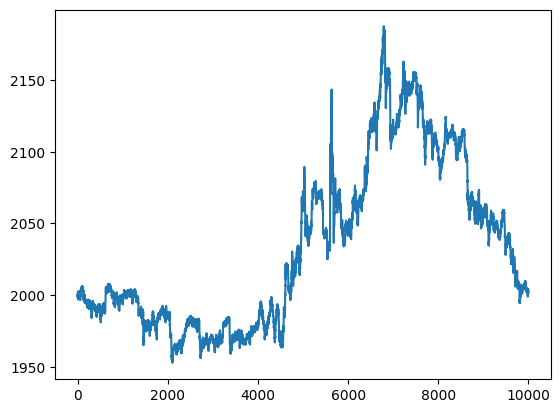

In [11]:
plt.plot(squid_prices)

In [12]:
spread_squid_2 = day_2_squid.bid_price_1 - day_2_squid.ask_price_1
spread_squid_3 = day_3_squid.bid_price_1 - day_3_squid.ask_price_1
spread_squid_1 = day_1_squid.bid_price_1 - day_1_squid.ask_price_1


In [13]:
mn_1 = np.mean(day_1_squid.mid_price)
mn_2 = np.mean(day_2_squid.mid_price)
mn_3 = np.mean(day_3_squid.mid_price)
print(mn_1,mn_2,mn_3)

2033.94805 1971.5486 1907.83865


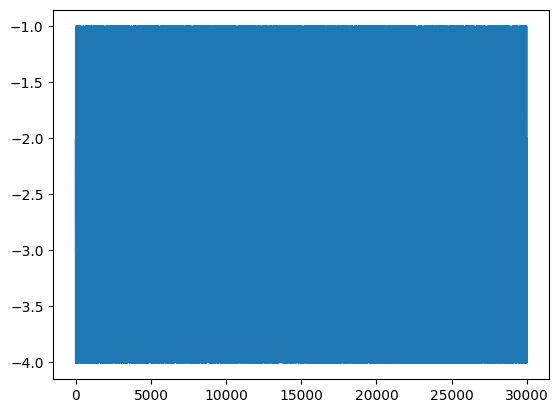

In [14]:
plt.plot(spread_squid_1)

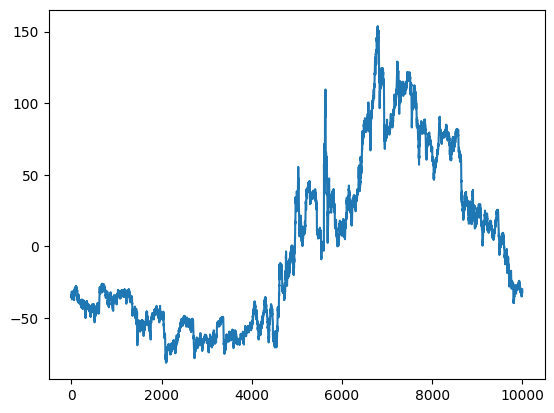

In [25]:
plt.plot(squid_prices-mn_1)

In [15]:
rolling_std_squid_1 = (day_3_squid.mid_price.rolling(50).std())
rolling_mean_squid_1 = (day_3_squid.mid_price.rolling(50).mean())
rolling_std_squid_2 = (day_3_squid.mid_price.rolling(200).std())
rolling_mean_squid_2 = (day_3_squid.mid_price.rolling(200).mean())

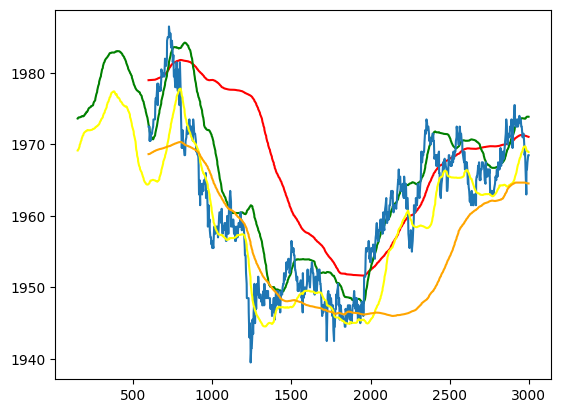

In [16]:

plt.plot((rolling_mean_squid_2+rolling_std_squid_2)[:1000],color="red")
plt.plot((rolling_mean_squid_1+rolling_std_squid_1)[:1000],color="green")
plt.plot((day_3_squid.mid_price[199:1000]))
plt.plot((rolling_mean_squid_1-rolling_std_squid_1)[:1000],color="yellow")
plt.plot((rolling_mean_squid_2-rolling_std_squid_2)[:1000],color="orange")

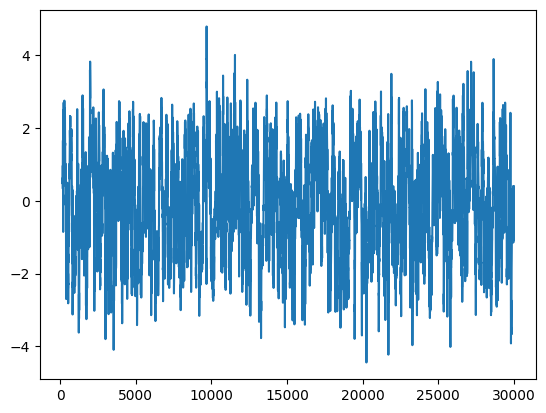

In [17]:
plt.plot((day_3_squid.mid_price - rolling_mean_squid_1)/(rolling_std_squid_1))

In [18]:
(day_3_squid.ask_price_1 - day_3_squid.bid_price_1).describe()

count    10000.000000
mean         2.618700
std          0.832574
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
dtype: float64

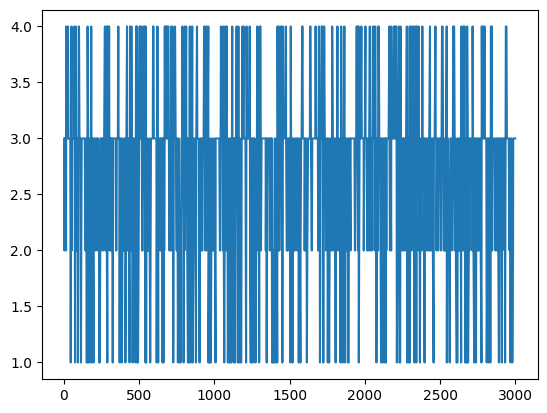

In [19]:
plt.plot((day_3_squid.ask_price_1 - day_3_squid.bid_price_1)[:1000])

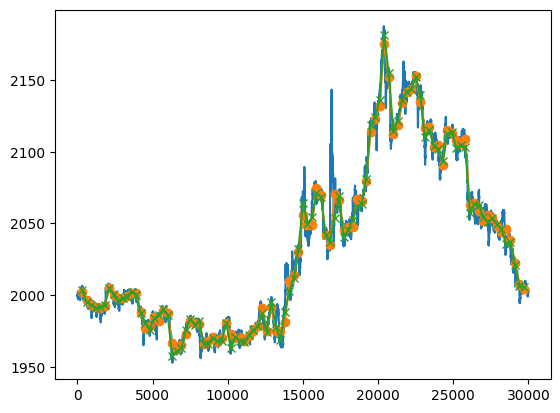

In [21]:
plt.plot(day_1_squid.mid_price)
plt.plot(day_1_squid.mid_price.rolling(50).mean()[::100],marker = 'o')
plt.plot(day_1_squid.mid_price.rolling(21).mean()[::100],marker='x')

In [22]:
rolling_std_squid_1 = (day_1_squid.mid_price.rolling(50).std())
rolling_mean_squid_1 = (day_1_squid.mid_price.rolling(50).mean())

In [23]:
(rolling_std_squid_1/rolling_mean_squid_1*100).mean()

np.float64(0.19481520303219568)

100 : 0.2802281352789752
110 : 0.29372499435029165
120 : 0.30643511475265167
130 : 0.31848570792180947
140 : 0.3299901559470506
150 : 0.3410342847110094
160 : 0.3516442228026062
170 : 0.3618263860726746
180 : 0.3716299904879165
190 : 0.38110154728552226
200 : 0.3902781010699001


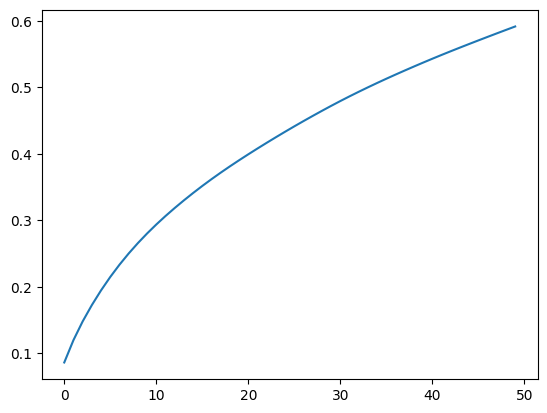

In [24]:
for window in range(100,210,10):
    rolling_std_squid_1 = (day_1_squid.mid_price.rolling(window).std())
    rolling_mean_squid_1 = (day_1_squid.mid_price.rolling(window).mean())
    print (window,": ",end="")
    print((rolling_std_squid_1/rolling_mean_squid_1*100).mean())

plt.plot(np.array([(day_1_squid.mid_price.rolling(window).std()/day_1_squid.mid_price.rolling(window).mean()).mean()*100 for window in range(10,510,10)]))


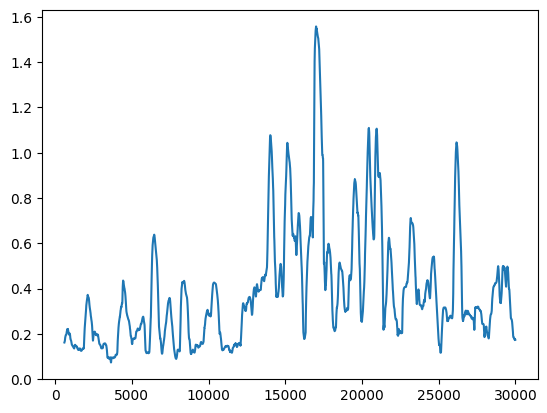

In [25]:
plt.plot(rolling_std_squid_1/rolling_mean_squid_1*100)

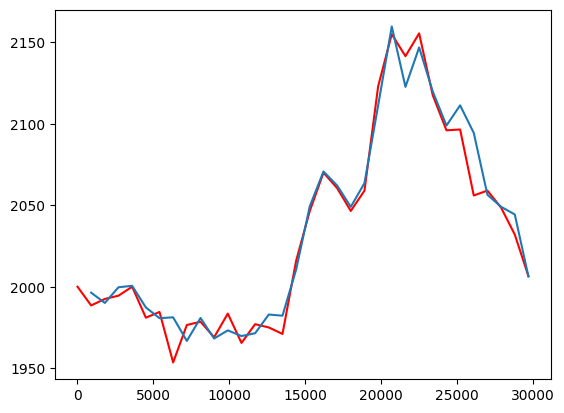

In [26]:
plt.plot((day_1_squid.mid_price)[::300],color="red")
plt.plot((rolling_mean_squid_1)[::300])

In [27]:
rolling_mean_squid_1 = (day_1_squid.mid_price.rolling(50).mean())

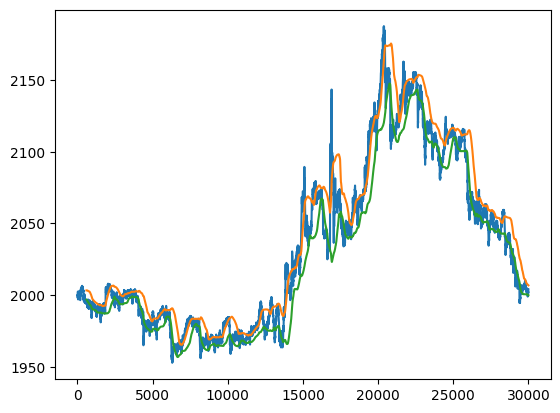

In [28]:
plt.plot(day_1_squid.mid_price)
window = 200
window2 = 500
plt.plot(day_1_squid.mid_price.rolling(window).std()+day_1_squid.mid_price.rolling(window).mean())
plt.plot(-day_1_squid.mid_price.rolling(window).std()+day_1_squid.mid_price.rolling(window).mean())
# plt.plot(day_1_squid.mid_price.rolling(window2).std()+day_1_squid.mid_price.rolling(window2).mean())
# plt.plot(-day_1_squid.mid_price.rolling(window2).std()+day_1_squid.mid_price.rolling(window2).mean())

In [29]:
(day_1_squid.ask_price_1[2:] - day_1_squid.ask_price_1[:-2]).describe()

count    9996.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: ask_price_1, dtype: float64

In [30]:
(day_1_squid.mid_price - rolling_mean_squid_1).describe()

count    9951.000000
mean        0.003487
std         7.294548
min       -52.720000
25%        -3.025000
50%         0.410000
75%         3.275000
max        68.040000
Name: mid_price, dtype: float64

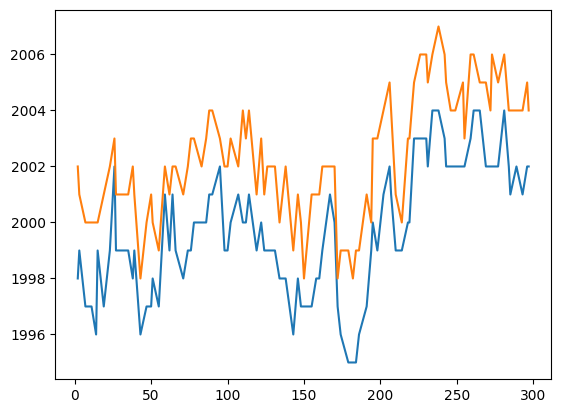

In [50]:
plt.plot(day_1_squid.bid_price_1[:100])
plt.plot(day_1_squid.ask_price_1[:100])